In [1]:
%load_ext autoreload
%autoreload 2

import os

# https://stackoverflow.com/questions/30791550/limit-number-of-threads-in-numpy
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=6

import re
import shutil
import random
import pprint
import itertools
import functools
import collections

import pysam
import pyranges as pr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
import sklearn.cluster
import sklearn.mixture

import sys
sys.path.append('/home/users/pjh/scripts/python_genome_package_dev')

In [2]:
import handygenome.cnv.rcopynumber as rcopynumber

In [44]:
def make_coords(raw_df):
    def iterator():
        for x in raw_df.index:
            tmp1 = x.split(':')
            tmp2 = tmp1[1].split('-')
            yield (tmp1[0], int(tmp2[0]), int(tmp2[1]))
    chroms, start1s, end1s = zip(*iterator())
    return chroms, start1s, end1s


def process_raw_df(raw_df):
    chroms, start1s, end1s = make_coords(raw_df)
    result = pd.DataFrame({
        'Chromosome': chroms,
        'Start': np.array(start1s) - 1,
        'End': end1s,
    })
    result = pd.concat([result, raw_df.reset_index(drop=True)], axis=1)
    return result


def make_segments(processed_df):
    result = dict()
    for sid in processed_df.columns[3:]:
        print(sid)
        input_df = processed_df.loc[:, ['Chromosome', 'Start', 'End', sid]]
        input_df.rename(columns={sid: 'depth_raw'}, inplace=True)
        seg, _ = rcopynumber.run_rcopynumber(
            depth_df=input_df,
            refver='hg19',
            as_gr=False,
            verbose=False,
        )
        result[sid] = seg
    return result
    

In [22]:
raw_crickreads = pd.read_table('/home/users/pjh/tmp/strandseq/crickreads.tsv.gz')
raw_watsonreads = pd.read_table('/home/users/pjh/tmp/strandseq/watsonreads.tsv.gz')

In [23]:
crickreads = process_raw_df(raw_crickreads)
watsonreads = process_raw_df(raw_watsonreads)

In [45]:
crickreads_segments = make_segments(crickreads)

lib_0Gy_single_1
lib_0Gy_single_10
lib_0Gy_single_11
lib_0Gy_single_12
lib_0Gy_single_13
lib_0Gy_single_14
lib_0Gy_single_15
lib_0Gy_single_16
lib_0Gy_single_17
lib_0Gy_single_18
lib_0Gy_single_19
lib_0Gy_single_2
lib_0Gy_single_20
lib_0Gy_single_21
lib_0Gy_single_22
lib_0Gy_single_23
lib_0Gy_single_24
lib_0Gy_single_25
lib_0Gy_single_26
lib_0Gy_single_27
lib_0Gy_single_28
lib_0Gy_single_29
lib_0Gy_single_3
lib_0Gy_single_30
lib_0Gy_single_4
lib_0Gy_single_5
lib_0Gy_single_6
lib_0Gy_single_7
lib_0Gy_single_8
lib_0Gy_single_9
lib_4Gy_single_1
lib_4Gy_single_10
lib_4Gy_single_11
lib_4Gy_single_12
lib_4Gy_single_13
lib_4Gy_single_14
lib_4Gy_single_15
lib_4Gy_single_16
lib_4Gy_single_17
lib_4Gy_single_18
lib_4Gy_single_19
lib_4Gy_single_2
lib_4Gy_single_20
lib_4Gy_single_21
lib_4Gy_single_22
lib_4Gy_single_23
lib_4Gy_single_24
lib_4Gy_single_25
lib_4Gy_single_26
lib_4Gy_single_27
lib_4Gy_single_28
lib_4Gy_single_29
lib_4Gy_single_3
lib_4Gy_single_30
lib_4Gy_single_4
lib_4Gy_single_5
lib_4G

In [64]:
watsonreads_segments = make_segments(watsonreads)

lib_0Gy_single_1
lib_0Gy_single_10
lib_0Gy_single_11
lib_0Gy_single_12
lib_0Gy_single_13
lib_0Gy_single_14
lib_0Gy_single_15
lib_0Gy_single_16
lib_0Gy_single_17
lib_0Gy_single_18
lib_0Gy_single_19
lib_0Gy_single_2
lib_0Gy_single_20
lib_0Gy_single_21
lib_0Gy_single_22
lib_0Gy_single_23
lib_0Gy_single_24
lib_0Gy_single_25
lib_0Gy_single_26
lib_0Gy_single_27
lib_0Gy_single_28
lib_0Gy_single_29
lib_0Gy_single_3
lib_0Gy_single_30
lib_0Gy_single_4
lib_0Gy_single_5
lib_0Gy_single_6
lib_0Gy_single_7
lib_0Gy_single_8
lib_0Gy_single_9
lib_4Gy_single_1
lib_4Gy_single_10
lib_4Gy_single_11
lib_4Gy_single_12
lib_4Gy_single_13
lib_4Gy_single_14
lib_4Gy_single_15
lib_4Gy_single_16
lib_4Gy_single_17
lib_4Gy_single_18
lib_4Gy_single_19
lib_4Gy_single_2
lib_4Gy_single_20
lib_4Gy_single_21
lib_4Gy_single_22
lib_4Gy_single_23
lib_4Gy_single_24
lib_4Gy_single_25
lib_4Gy_single_26
lib_4Gy_single_27
lib_4Gy_single_28
lib_4Gy_single_29
lib_4Gy_single_3
lib_4Gy_single_30
lib_4Gy_single_4
lib_4Gy_single_5
lib_4G

In [133]:
from handygenome.plot.genomeplot import GenomePlotter, CoordConverter

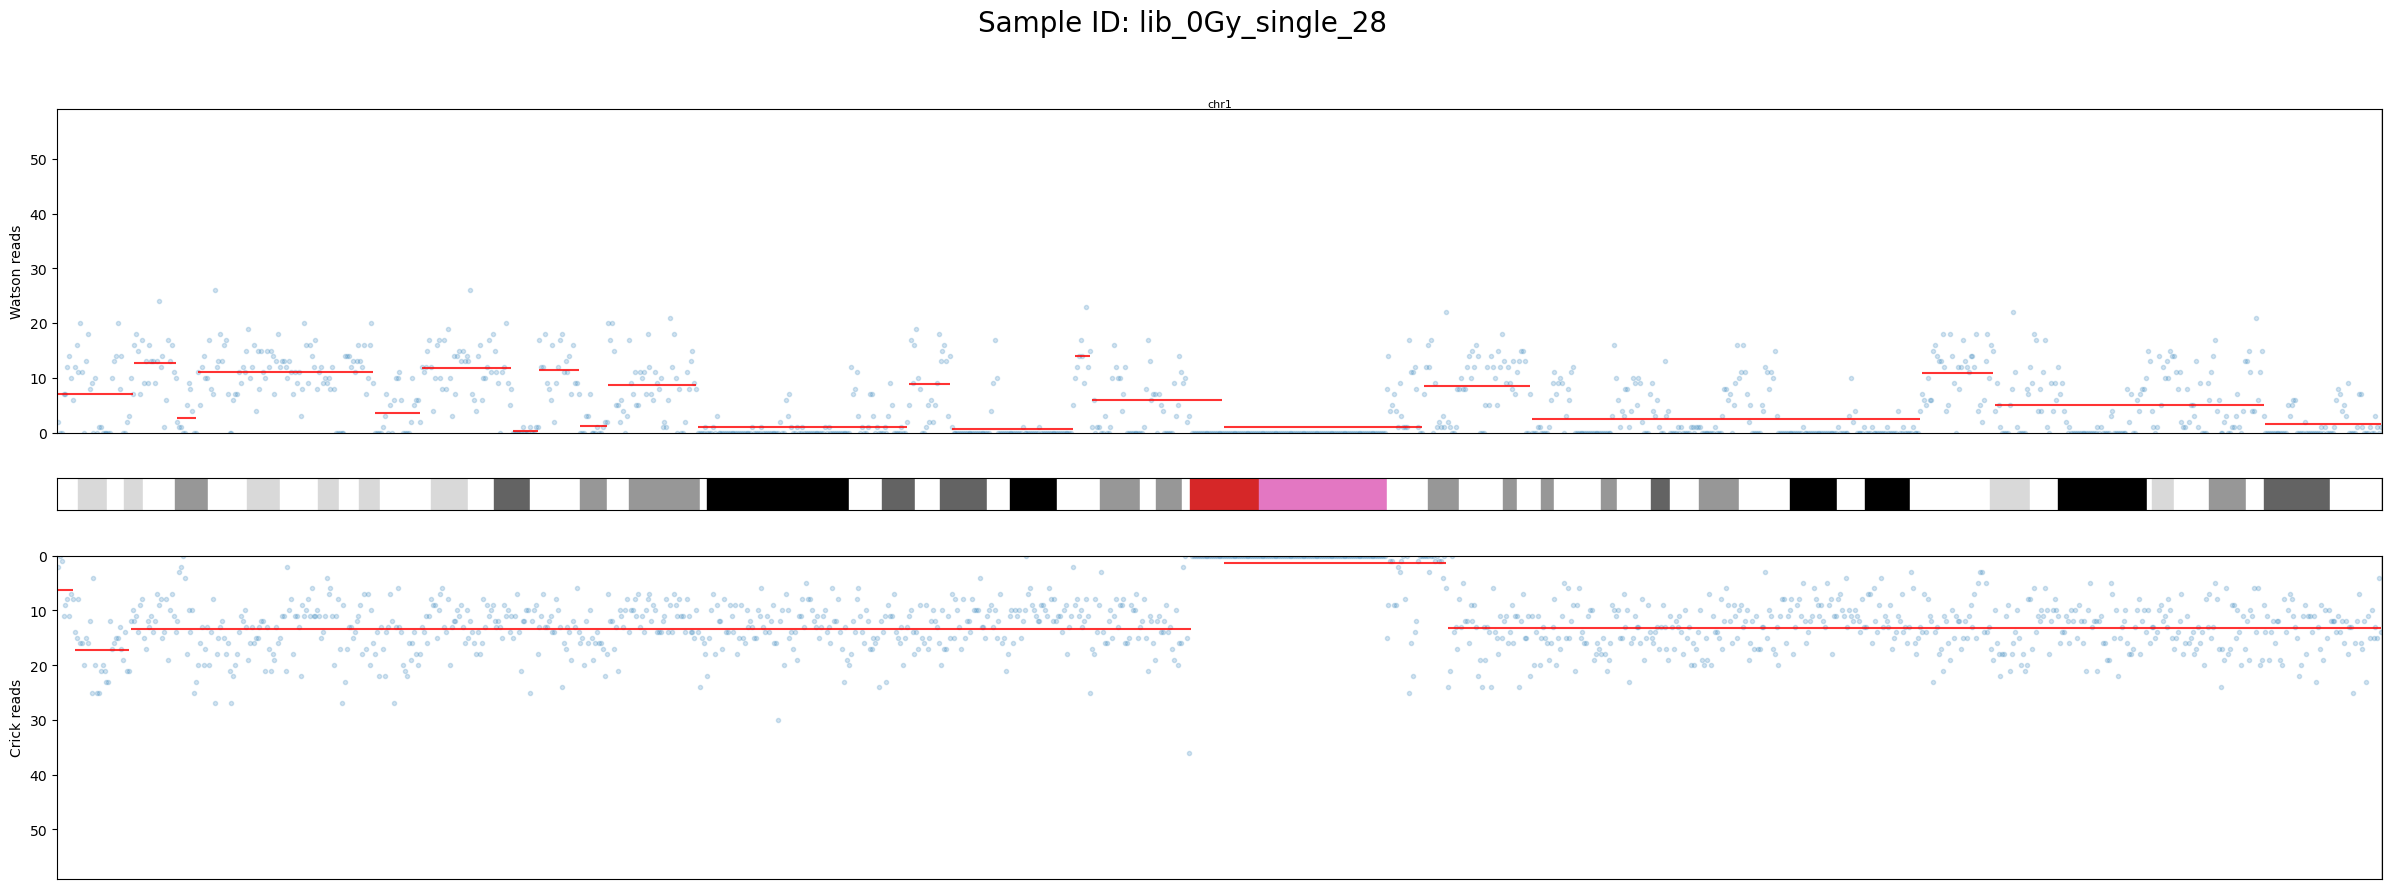

In [161]:
sampleid = 'lib_0Gy_single_28'

plotter = GenomePlotter(refver='hg19', chroms='1', region_gaps=True)
fig, axd = plt.subplot_mosaic( 
    [
        ['watson'], 
        ['ideogram'],
        ['crick'],
    ],
    figsize=(30, 10),
    gridspec_kw=dict(hspace=0.2, height_ratios=(10, 1, 10)),
)

fig.suptitle(f'Sample ID: {sampleid}', fontsize=20)

# ymax = np.mean(np.concatenate([watsonreads[sampleid], crickreads[sampleid]])) * 10
ymax = np.quantile(np.concatenate([watsonreads[sampleid], crickreads[sampleid]]), 0.999)
for ax in axd.values():
    ax.set_xticks([])
    ax.set_ylim(0, ymax)
    plotter.set_xlim(ax)
    
axd['crick'].invert_yaxis()

axd['crick'].set_ylabel('Crick reads')
axd['watson'].set_ylabel('Watson reads')
    
    
plotter.draw_dots(axd['watson'], y_colname=sampleid, df=watsonreads, plot_kwargs=dict(markersize=3, alpha=0.2, color='tab:blue'))
plotter.draw_hlines(axd['watson'], y_colname='depth_segment_mean', df=watsonreads_segments[sampleid], plot_kwargs=dict(alpha=0.8, color='red'))
plotter.draw_chrom_borders(axd['watson'], text_kwargs=dict(size=8))
    
    
plotter.draw_dots(axd['crick'], y_colname=sampleid, df=crickreads, plot_kwargs=dict(markersize=3, alpha=0.2, color='tab:blue'))
plotter.draw_hlines(axd['crick'], y_colname='depth_segment_mean', df=crickreads_segments[sampleid], plot_kwargs=dict(alpha=0.8, color='red'))
plotter.draw_chrom_borders(axd['crick'], draw_chrom_names=False)

axd['ideogram'].set_yticks([])
plotter.draw_ideogram(axd['ideogram'])
plotter.draw_chrom_borders(axd['ideogram'], draw_chrom_names=False)

In [152]:
import handygenome.common as common

df = common.DEFAULT_CHROMDICTS['hg19'].to_gr(assembled_only=True, as_gr=False)
df = CoordConverter.handle_df(df, True)

In [154]:
df

,Chromosome,Start,End,weight
0,1,0,249250621,1
1,-1,0,103189247,1
2,2,0,243199373,1
3,-2,0,103189247,1
4,3,0,198022430,1
...,...,...,...,...
42,22,0,51304566,1
43,-22,0,103189247,1
44,X,0,155270560,1
45,-23,0,103189247,1


In [155]:
gr = pr.PyRanges(df)

In [156]:
gr

,Chromosome,Start,End,weight
0,1,0,249250621,1
1,2,0,243199373,1
2,3,0,198022430,1
3,4,0,191154276,1
4,5,0,180915260,1
...,...,...,...,...
42,-21,0,103189247,1
43,-22,0,103189247,1
44,-23,0,103189247,1
45,X,0,155270560,1
